In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [9]:
ops.reset_default_graph()
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [10]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [15]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

TypeError: 'float' object cannot be interpreted as an index

In [16]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

NameError: name 'x_vals_train' is not defined

In [17]:
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [18]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [21]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [23]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [24]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
# First we initialize the loss vectors for storage
loss_vec = []
test_loss = []
for i in range(500):
    # first we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # we then select the training values
    rand_x = x_vals_train(rand_index)
    rand_y = np.transpose(y_vals_train[rand_index])
    # now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # we save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    
    # Finally, we run the test-set loss and save it
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    
    if (i + 1) % 50 == 0:
        print('Generation: ' + str(i + 1) + '. Loss = ' + str(temp_loss))

NameError: name 'x_vals_train' is not defined

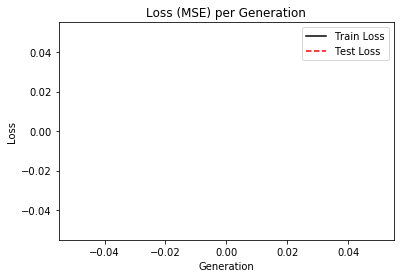

In [26]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()